# Pymaceuticals Inc.
---

### Analysis
Two data sets were given for this analysis,
1-Mouse_metadata
2-Study-results

Both these data sets combined into a single data frame and performed several analysis and visualizations to  compare the performance of Capomulin, against the other treatment regimens.
In this study, 249 mice who were identified with SCC tumors,but we had duplicate rows in the combined dataframe.
So as the first step all the duplicates were removed from the dataframe and made a clean dataframe for the further analysis.

### Summary Statistics:

Here some statistical operations were performed and found the mean, median, variance, standard deviation, and SEM of the tumor volume,then assembled these results in a single dataframe.


### Bar and Pie charts:

Here generated a bar plot showing the total number of rows 'Timepoints' for each drug regimen.From this graph we can see that Capomulin has the highest time points.

Then generated a pie plot showing the distribution of female versus male mice,and it showed that 51% of the data is male mice.

### Quartiles, Outliers and Boxplots:
Selected 4 regimens Capomulin, Ramicane, Infubinol, and Ceftamin for the rest of the analysis then calculated the final tumor volume of each mouse across this four of the treatment regimens.

Using this data calculated the IQR to determine if there are any potential outliers.

Generated a box plot that shows the distrubution of the tumor volume for each treatment group,

### Line and Scatter Plots:
Inorder to get more clarification about the Capomulin regimen, we selected a single mouse and generate a line plot of tumor volume vs. time point treated with Capomulin.

Then generated a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen.

### Correlation and Regression:
Using the previous scatter plot calculated the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen.

### Conclusins:

1) From the  Boxplots, compared to other regimens the Capomulin shows a left_skewness that is the smaller tumor volumes are more spreded out than the larger tumour volumes.

2) By considering single mouse with Capomulin, the  Line plot clearly shows that as the Timepoint increases the Tumorvolume is decreasing.So the performance of Capomulin is      very positive compared to other regimens.

3) After  all calculatins we got the correlation value as 0.84 ,means there is a strong linear correlation between the weight and tumor volumes.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_df=combined_df[combined_df.duplicated()]
value=dupe_df["Mouse ID"].unique()
value

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
opt_df=combined_df[combined_df["Mouse ID"]=='g989']
ind=opt_df.index
opt_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cln_df=combined_df.drop(index=ind)
cln_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
cln_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean_df=(cln_df.groupby(cln_df["Drug Regimen"])["Tumor Volume (mm3)"]).mean()
median_df=(cln_df.groupby(cln_df["Drug Regimen"])["Tumor Volume (mm3)"]).median()
var_df=(cln_df.groupby(cln_df["Drug Regimen"])["Tumor Volume (mm3)"]).var()
std_df=(cln_df.groupby(cln_df["Drug Regimen"])["Tumor Volume (mm3)"]).std()
err_df=(cln_df.groupby(cln_df["Drug Regimen"])["Tumor Volume (mm3)"]).sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stat_df=pd.concat([mean_df,median_df,var_df,std_df,err_df],axis=1)
stat_df.columns=[["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]]
stat_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df=cln_df.groupby(cln_df["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

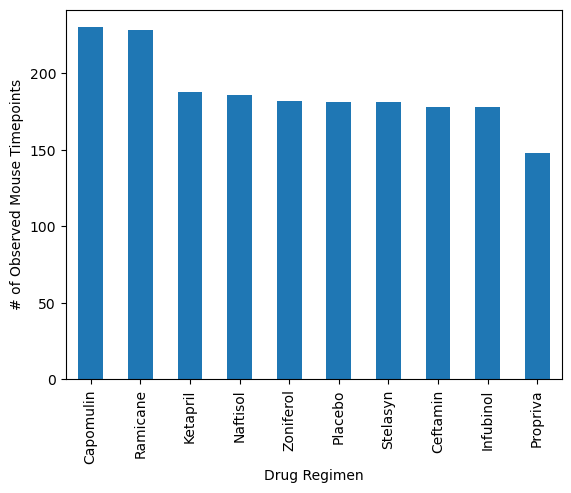

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

df=((cln_df.groupby(cln_df["Drug Regimen"])["Timepoint"]).count()).sort_values(ascending=False)
df.plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

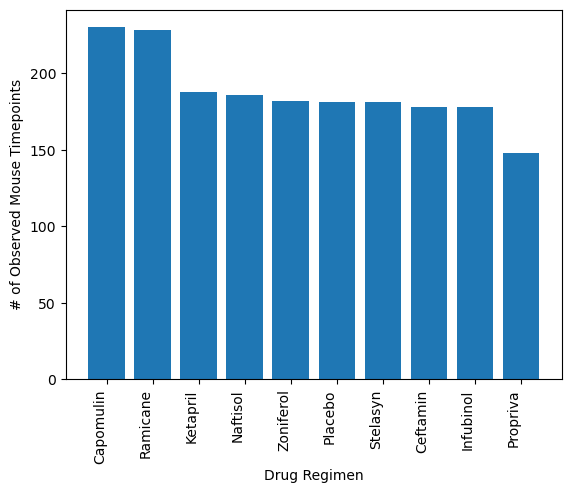

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
H=((cln_df.groupby(cln_df["Drug Regimen"])["Timepoint"]).count()).sort_values(ascending=False)
x_axis=H.index
plt.xticks(rotation=90, ha='right')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis,H,align="center")

plt.show()

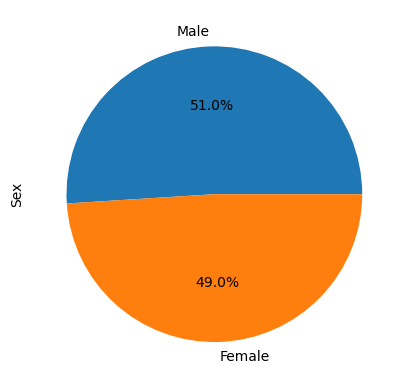

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=cln_df["Sex"].value_counts()
count=cln_df["Sex"].count()
perc_sex_df=round(sex/count*100)
perc_sex_df.plot.pie(labels=perc_sex_df.index, autopct='%.1f%%')
plt.ylabel("Sex")
plt.show()

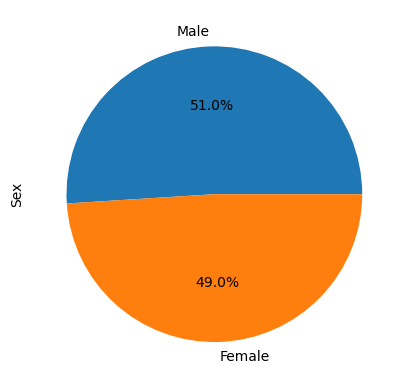

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=cln_df["Sex"].value_counts()
count=cln_df["Sex"].count()
perc_sex_df=round(sex/count*100)
size=perc_sex_df
label=perc_sex_df.index
plt.pie(perc_sex_df,labels=label,autopct='%.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

t_df=cln_df.groupby(cln_df["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

m_df=pd.merge(cln_df,t_df,on=["Mouse ID","Timepoint"],how="inner")
filter_df=m_df[(m_df["Drug Regimen"]=='Capomulin') | (m_df["Drug Regimen"]=='Ramicane') | (m_df["Drug Regimen"]=='Infubinol') | (m_df["Drug Regimen"]=='Ceftamin')]
filter_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,u153,0,45.000000,0,Ceftamin,Female,11,25
8,b447,0,45.000000,0,Ceftamin,Male,2,30
10,x226,0,45.000000,0,Ceftamin,Male,23,28
11,t573,0,45.000000,0,Ceftamin,Female,15,27
20,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
234,a644,45,32.978522,1,Ramicane,Female,7,17
240,i177,45,33.562402,3,Ramicane,Male,10,18
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in regimen:
   
    i_df=m_df[(m_df["Drug Regimen"]==i)]
    i_tumor_df=i_df["Tumor Volume (mm3)"]
    i_quartiles=i_tumor_df.quantile([.25,.50,.75])
    i_lower_quartile=i_quartiles[0.25]
    i_upper_quartile=i_quartiles[0.75]
    i_iqr=i_upper_quartile-i_lower_quartile
    i_lower_bound=i_lower_quartile-(1.5*i_iqr)
    i_upper_bound=i_upper_quartile-(1.5*i_iqr)
    i_outlit_df=(i_tumor_df < i_lower_bound) |(i_tumor_df> i_upper_bound)
    i_out=i_tumor_df.loc[i_outlit_df]
  
    if i=='Capomulin':
        cap_tumor_df=i_out
    elif i=='Ramicane':
        ram_tumor_df=i_out
    elif i=='Infubinol':
        inf_tumor_df=i_out
    elif i=='Ceftamin':
        cef_tumor_df=i_out
    
    print(f"{i}'s potential outliers:{i_out}")
# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 

# Determine outliers using upper and lower bounds


Capomulin's potential outliers:39     39.952347
46     46.539206
56     30.485985
98     38.753265
119    38.982878
124    34.455298
126    41.483008
132    37.074024
143    32.377357
146    40.159220
152    31.896238
155    33.329098
172    38.846876
176    40.658124
184    38.939633
193    36.041047
205    37.311846
209    40.728578
214    38.125164
233    47.685963
243    41.581521
244    31.023923
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:21     43.166373
44     44.183451
79     43.419381
85     38.342008
99     36.561652
118    31.095335
128    38.407618
131    45.220869
135    36.374510
150    30.276232
154    30.638696
156    40.659006
163    30.564625
177    33.397653
183    36.134852
188    31.560470
191    43.047543
199    37.311236
212    38.810366
222    40.667713
225    29.128472
229    37.225650
234    32.978522
240    33.562402
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers:20     36.321346
45     51.542431
59     54.

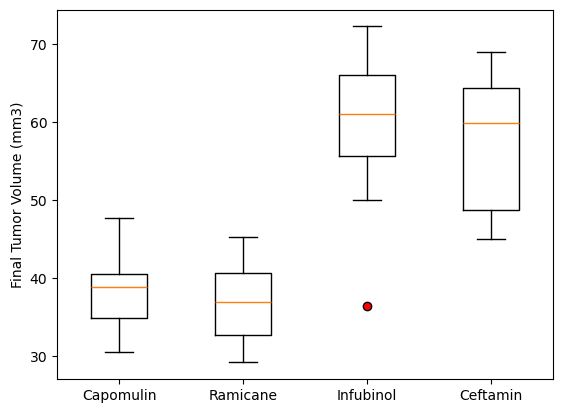

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
location=[1,2,3,4]
plt.boxplot([cap_tumor_df,ram_tumor_df,inf_tumor_df,cef_tumor_df],flierprops = dict(marker = "o", markerfacecolor = "red"))
plt.xticks(location,regimen)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

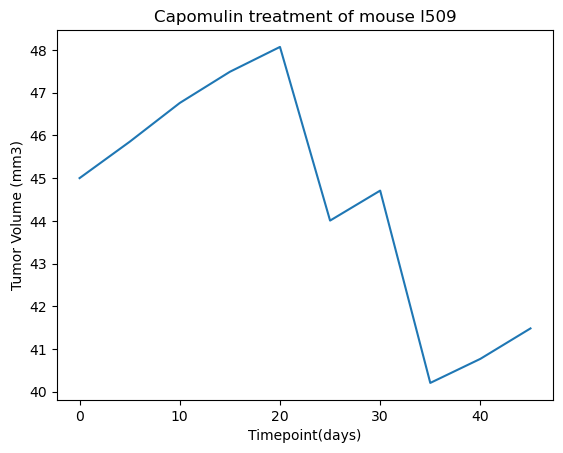

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_df=cln_df.loc[(cln_df["Mouse ID"]=='l509') & (cln_df["Drug Regimen"]=="Capomulin")]
time=single_df["Timepoint"]
tumor=single_df["Tumor Volume (mm3)"]
plt.plot(time,tumor)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

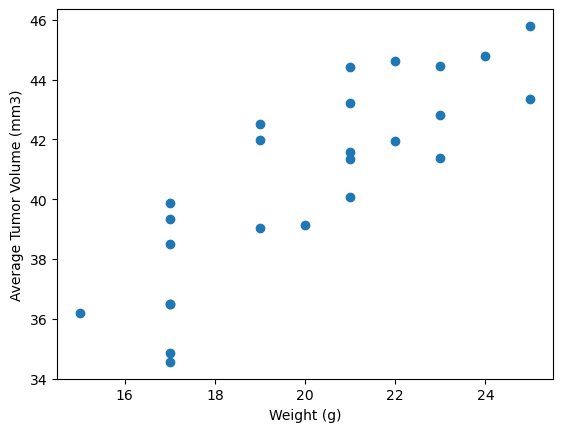

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scat_df=cln_df.loc[cln_df["Drug Regimen"]=="Capomulin"]
avg_tumor_df=(scat_df.groupby(scat_df["Mouse ID"])["Tumor Volume (mm3)"]).mean()
avg_weight_df=(scat_df.groupby(scat_df["Mouse ID"])["Weight (g)"]).mean()
plt.scatter(avg_weight_df,avg_tumor_df)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


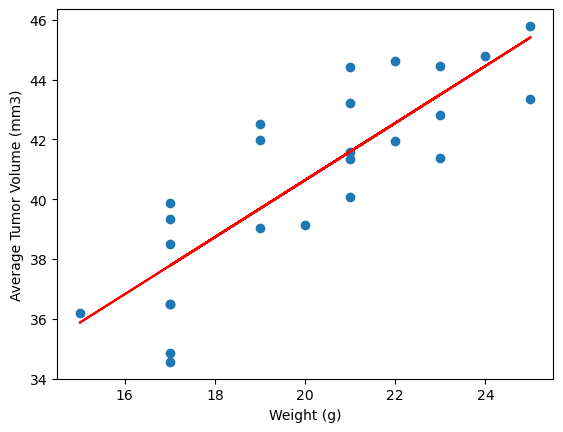

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(avg_weight_df,avg_tumor_df)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(avg_weight_df,avg_tumor_df)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
x_value=avg_weight_df
y_value=avg_tumor_df
(slope , intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
line_value=x_value * slope + intercept
plt.plot(x_value,line_value,"r-")
plt.show()
